In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import requests
import time
from config import api_key
from citipy import citipy

%matplotlib inline
style.use('fivethirtyeight')

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

632

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

for n, city in enumerate(cities, start=1):
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log city being processed
    print("Record count:", n, "City:", city)
    
    # Run API request for each city
    try:
        
        # Make request
        city_weather = requests.get(city_url).json()
        
        # Retrieve data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Record count: 1 City: sorong
Record count: 2 City: fortuna
Record count: 3 City: margate
Record count: 4 City: vaini
Record count: 5 City: ushuaia
Record count: 6 City: butaritari
Record count: 7 City: sibu
Record count: 8 City: clarence town
Record count: 9 City: sitka
Record count: 10 City: nampula
Record count: 11 City: angoram
Record count: 12 City: rikitea
Record count: 13 City: torbay
Record count: 14 City: dikson
Record count: 15 City: tasiilaq
Record count: 16 City: thompson
Record count: 17 City: saint-philippe
Record count: 18 City: pangnirtung
Record count: 19 City: palabuhanratu
City not found. Skipping...
Record count: 20 City: diamantino
Record count: 21 City: georgetown
Record count: 22 City: victoria
Record count: 23 City: mwinilunga
Record count: 24 City: ponta do sol
Record count: 25 City: mataura
Record count: 26 City: mar del plata
Record count: 27 City: kaitangata
Record count: 28 City: punta arenas
Record count: 29 City: charlestown
Record count: 30 City: kota bel

Record count: 233 City: kindu
Record count: 234 City: kieta
Record count: 235 City: semporna
Record count: 236 City: iqaluit
Record count: 237 City: sentyabrskiy
City not found. Skipping...
Record count: 238 City: constitucion
Record count: 239 City: kaz
Record count: 240 City: campos altos
Record count: 241 City: bengkulu
City not found. Skipping...
Record count: 242 City: chegdomyn
Record count: 243 City: sao filipe
Record count: 244 City: tual
Record count: 245 City: tuktoyaktuk
Record count: 246 City: ardistan
City not found. Skipping...
Record count: 247 City: santa cruz
Record count: 248 City: marmaris
Record count: 249 City: jos
Record count: 250 City: benjamin hill
Record count: 251 City: coihaique
Record count: 252 City: wanning
Record count: 253 City: lakeway
Record count: 254 City: pakxan
Record count: 255 City: kamenskoye
City not found. Skipping...
Record count: 256 City: sharjah
Record count: 257 City: fare
Record count: 258 City: manitouwadge
Record count: 259 City: noua

Record count: 454 City: gawler
Record count: 455 City: umm lajj
Record count: 456 City: haines junction
Record count: 457 City: kirakira
Record count: 458 City: frontera
Record count: 459 City: ukiah
Record count: 460 City: madimba
Record count: 461 City: bobrovytsya
Record count: 462 City: paita
Record count: 463 City: hambantota
Record count: 464 City: cayenne
Record count: 465 City: broome
Record count: 466 City: mpongwe
Record count: 467 City: samarai
Record count: 468 City: imbituba
Record count: 469 City: ust-kuyga
Record count: 470 City: lolua
City not found. Skipping...
Record count: 471 City: kapit
Record count: 472 City: emerald
Record count: 473 City: udachnyy
Record count: 474 City: yichang
Record count: 475 City: malyye derbety
Record count: 476 City: muroto
Record count: 477 City: asau
City not found. Skipping...
Record count: 478 City: kendari
Record count: 479 City: breza
Record count: 480 City: bien hoa
Record count: 481 City: anori
Record count: 482 City: vaitape
Reco

## Pandas Analysis

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sorong,76,ID,1533408543,100,-0.86,131.25,79.89,15.21
1,fortuna,0,ES,1533407400,58,38.18,-1.13,91.40,1.12
2,margate,0,AU,1533405600,87,-43.03,147.26,46.40,3.36
3,vaini,92,IN,1533408544,99,15.34,74.49,68.19,6.93
4,ushuaia,40,AR,1533405600,59,-54.81,-68.31,37.40,11.41


In [5]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

output_data_file = "output/cities.csv"

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [6]:
# Get info on dataset
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 9 columns):
City          565 non-null object
Cloudiness    565 non-null int64
Country       565 non-null object
Date          565 non-null int64
Humidity      565 non-null int64
Lat           565 non-null float64
Lng           565 non-null float64
Max Temp      565 non-null float64
Wind Speed    565 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.8+ KB


### Latitude vs Temperature Plot

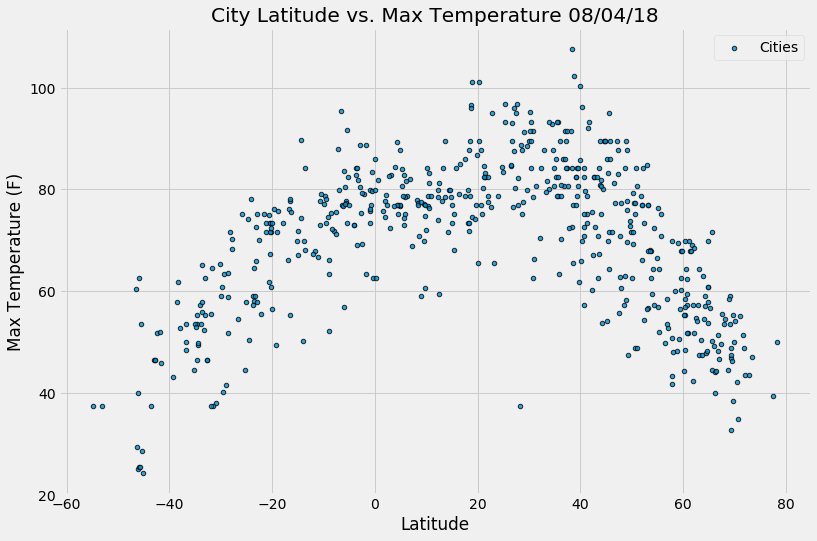

In [31]:
# Build scatter plot for latitude vs temperature
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Max Temp",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

### Latitude vs Humidity

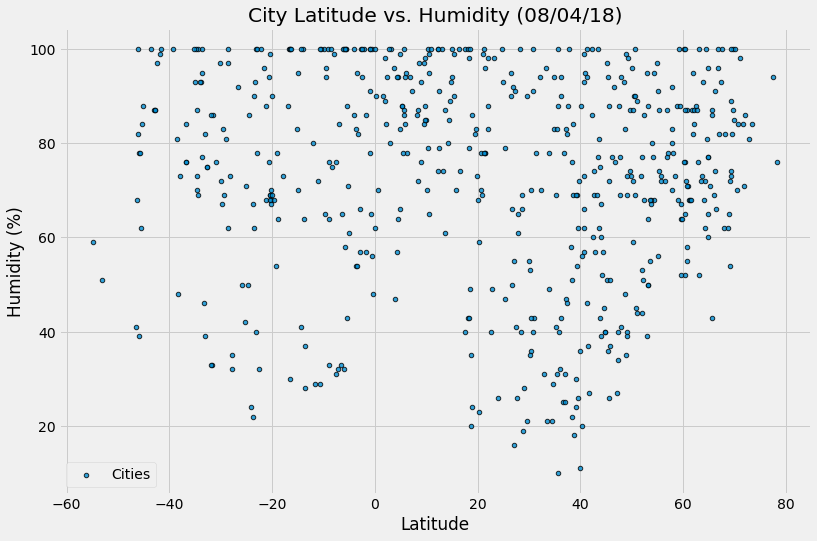

In [36]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Humidity",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

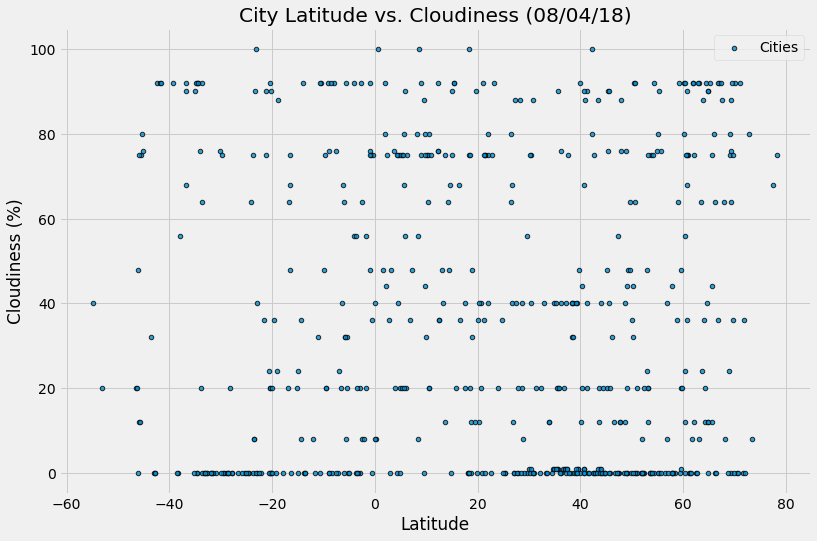

In [38]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Cloudiness",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

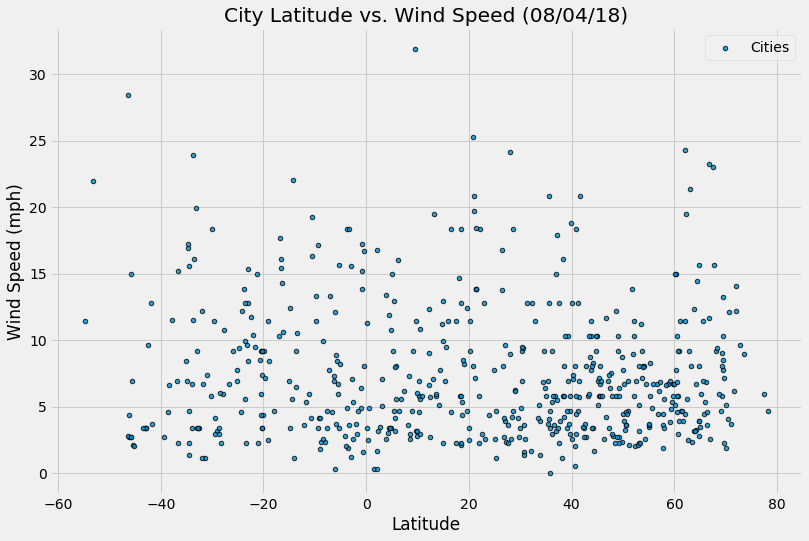

In [39]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Wind Speed",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()